In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = tf.placeholder(dtype=tf.float32,shape=[10,2])

In [3]:
y = tf.placeholder(dtype=tf.float32,shape=[10,1])

In [4]:
m = tf.Variable(tf.random_normal([2,1]))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
b = tf.Variable(tf.random_normal([]))

In [6]:
model = tf.nn.sigmoid(tf.add(tf.matmul(x,m),b))

In [7]:
first_val = tf.matmul(tf.transpose(y),tf.log(model))
second_val = tf.matmul(tf.transpose(1. - y),(tf.log(1. - model)))
loss = -0.1 * tf.reduce_sum(first_val + second_val)

In [8]:
learn_rate = 0.01
num_epochs = 400

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)

In [10]:
init = tf.global_variables_initializer()

In [11]:
y_vals = np.array([1,1,1,1,1,0,0,0,0,0])
y_vals = y_vals.reshape(10,1)
y_vals

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [12]:
x_vals = np.array([[2,4],[3,5],[1,8],[4,5],[4,6],[2,-5],[1,-9],[4,-6],[3,-4],[4,-3]])

In [13]:
x1 = x_vals[:, 0].reshape(10, 1)
x2 = x_vals[:, 1].reshape(10, 1)

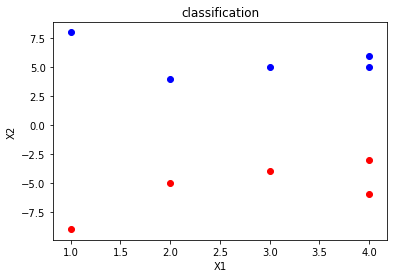

In [14]:
plt.scatter(x1[y_vals == 1], x2[y_vals == 1], c = 'blue')
plt.scatter(x1[y_vals == 0], x2[y_vals == 0], c = 'red')
plt.title('classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        sess.run(optimizer, feed_dict={x:x_vals,y:y_vals})
        print('m = ', sess.run(m))
        print('b = ', sess.run(b))
        print("-----------------------")
        print('loss = ', sess.run(loss, feed_dict={x:x_vals,y:y_vals}))
        print("-----------------------")
    weight = np.array([0,0])
    weight = sess.run(m)
    intercept = np.array([])
    intercept = sess.run(b)

In [ ]:
weight
intercept

In [ ]:
# creating and visualizing the decision boundery
x_2 = -((x1 * weight[0])+ intercept)/weight[1]
x_range = np.linspace(1,10,100)
plt.scatter(x1[y_vals == 1], x2[y_vals == 1], c = 'blue')
plt.scatter(x1[y_vals == 0], x2[y_vals == 0], c = 'red')
plt.plot(x1, x_2, "black")
plt.title('classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()